In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
!pip install keras==2.14

In [3]:
!pip install patchify

In [4]:
!pip install segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.2 MB/s eta 0:00:00


In [5]:
pip install tensorflow

In [6]:
!pip install scikeras

In [7]:
!pip install imblearn

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from scikeras.wrappers import KerasClassifier,KerasRegressor
from sklearn import model_selection
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, Flatten
import random
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [9]:
pd.set_option('display.float_format', lambda x:'%3f' %x)

In [10]:
%matplotlib inline

Part A - Q1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries.

In [11]:
%cd /content/gdrive/My Drive/Colab Notebooks/
df_signal = pd.read_csv("NN Project Data - Signal.csv")
df_signal.shape

/content/gdrive/My Drive/Colab Notebooks


(1599, 12)

In [12]:
df_signal.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


In [13]:
df_signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df_signal.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Part A - Q1 B - Check for missing values and print percentage for each attribute.

In [15]:
percent_missing = df_signal.isnull().sum() * 100 / len(df_signal)
missing_value_df = pd.DataFrame({'column_name': df_signal.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

                     column_name  percent_missing
Parameter 1          Parameter 1         0.000000
Parameter 2          Parameter 2         0.000000
Parameter 3          Parameter 3         0.000000
Parameter 4          Parameter 4         0.000000
Parameter 5          Parameter 5         0.000000
Parameter 6          Parameter 6         0.000000
Parameter 7          Parameter 7         0.000000
Parameter 8          Parameter 8         0.000000
Parameter 9          Parameter 9         0.000000
Parameter 10        Parameter 10         0.000000
Parameter 11        Parameter 11         0.000000
Signal_Strength  Signal_Strength         0.000000


In [16]:
df_signal.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

There are no missing values in the dataset

Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method

In [17]:
df_signal.duplicated().sum()

240

imputing wont solve the purpose as duplicates will still exist.

In [18]:
df_grouped = df_signal.groupby('Signal_Strength').mean().reset_index()
print(df_grouped)

   Signal_Strength  Parameter 1  Parameter 2  Parameter 3  Parameter 4  \
0                3     8.360000     0.884500     0.171000     2.635000   
1                4     7.779245     0.693962     0.174151     2.694340   
2                5     8.167254     0.577041     0.243686     2.528855   
3                6     8.347179     0.497484     0.273824     2.477194   
4                7     8.872362     0.403920     0.375176     2.720603   
5                8     8.566667     0.423333     0.391111     2.577778   

   Parameter 5  Parameter 6  Parameter 7  Parameter 8  Parameter 9  \
0     0.122500    11.000000    24.900000     0.997464     3.398000   
1     0.090679    12.264151    36.245283     0.996542     3.381509   
2     0.092736    16.983847    56.513950     0.997104     3.304949   
3     0.084956    15.711599    40.869906     0.996615     3.318072   
4     0.076588    14.045226    35.020101     0.996104     3.290754   
5     0.068444    13.277778    33.444444     0.995212     3.2

Hence, dropping duplicates

In [19]:
df_grouped.duplicated().sum()

0

In [20]:
df_signal.drop_duplicates(inplace=True)

In [21]:
df_signal.duplicated().sum()

0

Part A - Q1 D - Visualise distribution of the target variable.

In [22]:
df_signal['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

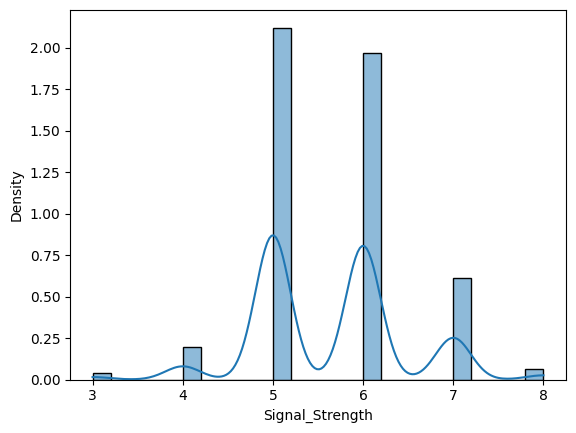

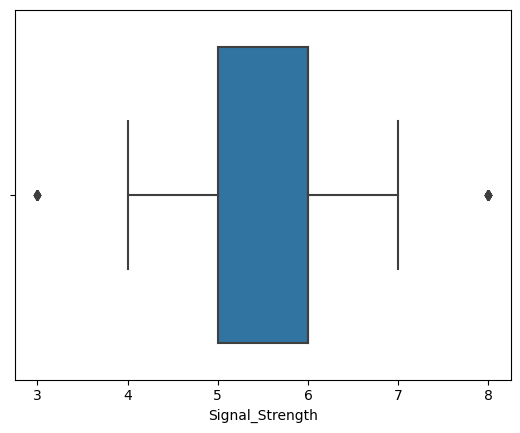

In [23]:
sns.histplot(data=df_signal, x='Signal_Strength', stat='density', bins=25, kde='true')
plt.show()

sns.boxplot(data=df_signal, x='Signal_Strength')
plt.show()

Part A - Q1 E - Share insights from the initial data analysis (at least 2).

Only signals with strength of 5 & 6, have highest number of records and for other values, we have very few records which are outliers in this case.

Part A - Q2 A - Split the data into X & Y.

In [24]:
X=df_signal.drop(['Signal_Strength'], axis=1)

Y=df_signal['Signal_Strength']

Part A - Q2 B - Split the data into train & test with 70:30 proportion.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

Part A - Q2 C - Print shape of all the 4 variables and verify if train and test data is in sync.

In [26]:
print(X_train.shape)
print(y_train.shape)

(1087, 11)
(1087,)


In [27]:
print(X_test.shape)
print(y_test.shape)

(272, 11)
(272,)


Part A - Q2 D - Normalise the train and test data with appropriate method.

In [28]:
scaler = MinMaxScaler()
x_train_data_norm = scaler.fit_transform(X_train)
x_test_data_norm = scaler.transform(X_test)

In [29]:
normalized_x_train = pd.DataFrame(x_train_data_norm, columns = X_train.columns)
normalized_x_test = pd.DataFrame(x_test_data_norm, columns = X_test.columns)

In [30]:
print(normalized_x_train.shape)
print(normalized_x_test.shape)

(1087, 11)
(272, 11)


Part A - Q2 E - Transform Labels into format acceptable by Neural Network

In [31]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print("First 1 training lables as one-hot encoded vectors:\n", y_train[:1])

First 1 training lables as one-hot encoded vectors:
 1031    7
Name: Signal_Strength, dtype: int64


In [32]:
print(y_train.shape)
print(y_test.shape)

(1087,)
(272,)


In [33]:
print(y_train_cat.shape)
print(y_test_cat.shape)

(1087, 9)
(272, 9)


Part A - Q3 A - Design a Neural Network to train a classifier.

In [34]:
model_signal_1 = Sequential()

In [35]:
model_signal_1.add(Dense(200,activation = 'relu', input_dim = 11))
model_signal_1.add(Dense(100,activation = 'relu'))
model_signal_1.add(Dense(50, activation='relu'))
model_signal_1.add(Dense(units=9, activation = 'softmax'))

opt = optimizers.Adam(learning_rate= 0.01)
model_signal_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
model_signal_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               2400      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 9)                 459       
                                                                 
Total params: 28009 (109.41 KB)
Trainable params: 28009 (109.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


3.B.Train the classifier using previously designed Architecture

In [37]:
history_signal_1 = model_signal_1.fit(normalized_x_train, y_train_cat, validation_split=0.2, batch_size=50, epochs=50, verbose=1)

Epoch 1/50
18/18 [==============================] - 1s 13ms/step - loss: 1.4206 - accuracy: 0.4281 - val_loss: 1.2066 - val_accuracy: 0.5138
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 1.1095 - accuracy: 0.5535 - val_loss: 1.0933 - val_accuracy: 0.5321
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 1.0093 - accuracy: 0.5811 - val_loss: 1.0474 - val_accuracy: 0.5413
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.9900 - accuracy: 0.5823 - val_loss: 1.1425 - val_accuracy: 0.4862
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.9807 - accuracy: 0.5995 - val_loss: 1.0476 - val_accuracy: 0.5275
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 0.9664 - accuracy: 0.5972 - val_loss: 1.1275 - val_accuracy: 0.5459
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.9745 - accuracy: 0.5754 - val_loss: 1.0337 - val_accuracy: 0.5183
Epoch 8/50
18/18 [=

3.C.Plot 2 separate visuals
i. Training Loss and Validation Loss
ii. Training Accuracy and Validation Accuracy


In [199]:
train_score = model_signal_1.evaluate(normalized_x_train, y_train_cat, verbose=1)
print(train_score)

test_score = model_signal_1.evaluate(normalized_x_test, y_test_cat, verbose=1)
print( test_score)

34/34 [==============================] - 0s 1ms/step - loss: 0.8231 - accuracy: 0.6486
[0.8231303691864014, 0.6485740542411804]
9/9 [==============================] - 0s 2ms/step - loss: 1.1382 - accuracy: 0.5515
[1.1382195949554443, 0.5514705777168274]


9/9 [==============================] - 0s 2ms/step - loss: 1.1382 - accuracy: 0.5515


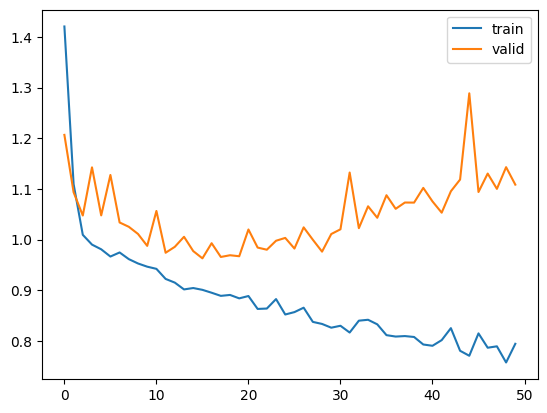

In [38]:
# Capturing learning history per epoch
hist_1  = pd.DataFrame(history_signal_1.history)
hist_1['epoch'] = history_signal_1.epoch

# Plotting accuracy at different epochs
plt.plot(hist_1['loss'])
plt.plot(hist_1['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results_signal_1 = model_signal_1.evaluate(normalized_x_test, y_test_cat)

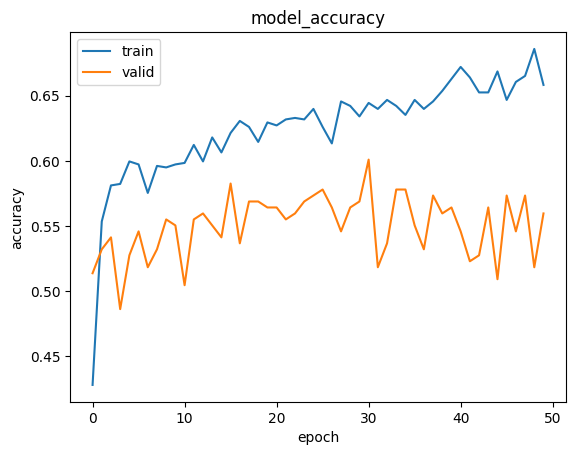

In [39]:
# Plotting accuracy at different epochs
plt.plot(history_signal_1.history['accuracy'])
plt.plot(history_signal_1.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(("train" , "valid") , loc ='best')
plt.show()

In [40]:
y_pred=model_signal_1.predict(normalized_x_test)
y_pred[0]

9/9 [==============================] - 0s 2ms/step


array([9.4152902e-06, 5.8857327e-06, 9.6154408e-06, 2.6752271e-06,
       4.2607024e-04, 1.2833513e-01, 5.7608092e-01, 2.7767166e-01,
       1.7458610e-02], dtype=float32)

3.D. Design new architecture/update existing architecture in attempt to improve the performance of the model.

upsampling data using SMOTE

In [41]:
sm = SMOTE(sampling_strategy={3:200,4:200,5:469,6:469, 7:300,8:200})

X_train_res, y_train_res=sm.fit_resample(normalized_x_train, y_train)

#After upsampling
print(X_train_res.shape)
print(y_train_res.shape)

(1838, 11)
(1838,)


In [43]:
y_train_res_cat = to_categorical(y_train_res)


In [44]:
y_train_res_cat.shape

(1838, 9)

In [45]:
y_test_cat.shape

(272, 9)

In [46]:
normalized_x_test.shape

(272, 11)

Adding grid search cv to model

In [151]:
def create_model_v5(lr):
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train_res.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(9, activation='softmax'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [152]:
keras_estimator = KerasRegressor(model=create_model_v5, verbose=1, lr=0.01)

# define the grid search parameters
param_grid = {
    'lr':[0.1,0.01,0.001]
    }

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [153]:
grid_result = grid.fit(X_train_res, y_train_res_cat,validation_split=0.2,verbose=1)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
46/46 [==============================] - 1s 5ms/step - loss: 1.8474 - accuracy: 0.2803 - val_loss: 3.1803 - val_accuracy: 0.0543


In [154]:
estimator_v5=create_model_v5(lr=grid_result.best_params_['lr'])

estimator_v5.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 256)               3072      
                                                                 
 dropout_40 (Dropout)        (None, 256)               0         
                                                                 
 dense_118 (Dense)           (None, 128)               32896     
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_119 (Dense)           (None, 64)                8256      
                                                                 
 dropout_42 (Dropout)        (None, 64)                0         
                                                                 
 dense_120 (Dense)           (None, 32)              

In [155]:
print(grid_result.best_params_['lr'])

0.001


In [158]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train_res, y_train_res_cat, epochs=50, batch_size = 50, verbose=1,validation_split=0.2)

Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 0.7886 - accuracy: 0.6639 - val_loss: 1.5371 - val_accuracy: 0.3152
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7787 - accuracy: 0.6599 - val_loss: 1.4614 - val_accuracy: 0.3043
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7934 - accuracy: 0.6707 - val_loss: 1.5427 - val_accuracy: 0.2772
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 0.7761 - accuracy: 0.6850 - val_loss: 1.7649 - val_accuracy: 0.2120
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7855 - accuracy: 0.6653 - val_loss: 1.5366 - val_accuracy: 0.2636
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 0.7680 - accuracy: 0.6803 - val_loss: 1.6294 - val_accuracy: 0.2582
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.7444 - accuracy: 0.6959 - val_loss: 1.5699 - val_accuracy: 0.2745
Epoch 8/50
30/30 [==

In [159]:
score = estimator_v5.evaluate(X_train_res, y_train_res_cat, verbose=1)
print(score)

score_t = estimator_v5.evaluate(normalized_x_test, y_test_cat, verbose=1)
print( score_t)

58/58 [==============================] - 0s 1ms/step - loss: 0.7294 - accuracy: 0.6681
[0.7293527126312256, 0.6681175231933594]
9/9 [==============================] - 0s 2ms/step - loss: 1.3600 - accuracy: 0.5184
[1.359991192817688, 0.5183823704719543]


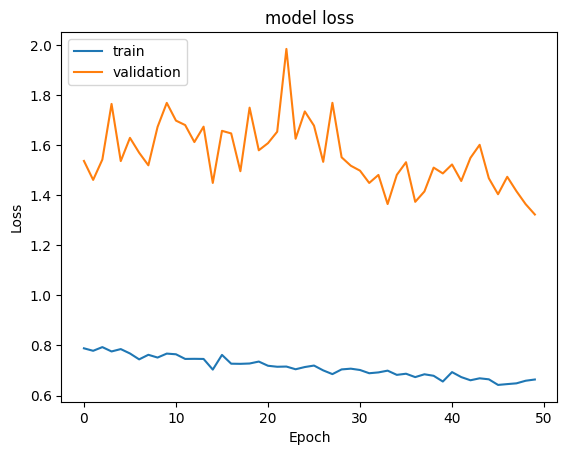

In [160]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

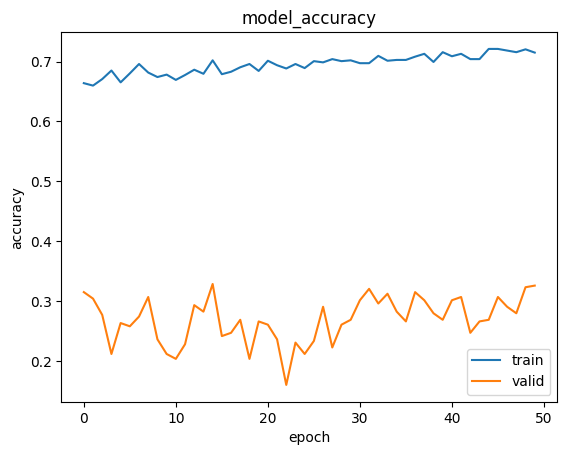

In [161]:
# Plotting accuracy at different epochs
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(("train" , "valid") , loc ='best')
plt.show()

Applying grid search cv, upsampling, dropout's none of them has helped. The accuracy of test data has infact dropped from 55 to 52 %.

Model 1
Training Accuracy - 64.86%
Testing Accuracy - 55.15%

Model 2
Training Accuracy - 66.81%
Testing Accuracy - 51.84%

On trying batch normalization on model, the test accuracy had not improved.

## **PART B**

Part B - Q1 A - Read the .h5 file and assign to a variable.

In [162]:
!pip install h5py

In [163]:
import h5py
%cd /content/gdrive/My Drive/Colab Notebooks/

/content/gdrive/My Drive/Colab Notebooks


In [164]:
f1=h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

Part B - Q1 B - Print all the keys from the .h5 file.

In [165]:
f1.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test

In [166]:
X_train_svhn=f1['X_train'][:]
X_test_svhn=f1['X_test'][:]
y_train_svhn=f1['y_train'][:]
y_test_svhn=f1['y_test'][:]

Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [167]:
print(X_train_svhn.shape)
print(X_test_svhn.shape)
print(y_test_svhn.shape)
print(y_train_svhn.shape)

(42000, 32, 32)
(18000, 32, 32)
(18000,)
(42000,)


In [168]:
f1.close

<bound method File.close of <HDF5 file "Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>>

Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels

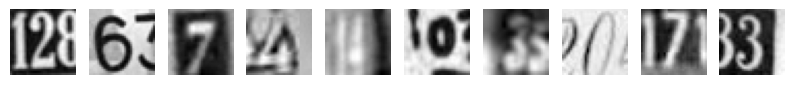

label for each of the above image: 1031    7
844     6
38      4
1384    5
611     5
631     5
7       7
816     6
1282    6
1081    7
Name: Signal_Strength, dtype: int64


In [169]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train_svhn[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

Part B - Q2 C -Reshape all the images with appropriate shape update the data in same variable.

In [170]:
image_vector_size = 32*32
x_train_svhn = X_train_svhn.reshape(X_train_svhn.shape[0], image_vector_size)
x_test_svhn = X_test_svhn.reshape(X_test_svhn.shape[0], image_vector_size)


Part B - Q2 D - Normalise the images i.e. Normalise the pixel values.

In [171]:
x_train_svhn = x_train_svhn.astype('float32')
x_test_svhn = x_test_svhn.astype('float32')
# # normalize inputs from 0-255 to 0-1
x_train_svhn = x_train_svhn / 255.0
x_test_svhn = x_test_svhn / 255.0

print('Training set', x_train_svhn.shape, y_train_svhn.shape)
print('Test set', x_test_svhn.shape, y_test_svhn.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


Part B - Q2 E - Transform Labels into format acceptable by Neural Network

In [172]:
from tensorflow.keras.utils import to_categorical
y_train_svhn = to_categorical(y_train_svhn)
y_test_svhn = to_categorical(y_test_svhn)

Part B - Q2 F - Print total Number of classes in the Dataset.

In [173]:
num_classes_svhn = y_test_svhn.shape[1]
num_classes_svhn

10

Part B - Q3 A - Design a Neural Network to train a classifier.

In [192]:
image_size=32*32

model_svhn = Sequential()

model_svhn.add(BatchNormalization(input_shape=(image_size,)))
model_svhn.add(Dense(256, activation='relu'))
model_svhn.add(Dense(64, activation='relu'))
model_svhn.add(Dense(32, activation='relu'))
model_svhn.add(Dense(num_classes_svhn, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(0.001)
model_svhn.compile(loss= 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model_svhn.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dense_142 (Dense)           (None, 256)               262400    
                                                                 
 dense_143 (Dense)           (None, 64)                16448     
                                                                 
 dense_144 (Dense)           (None, 32)                2080      
                                                                 
 dense_145 (Dense)           (None, 10)                330       
                                                                 
Total params: 285354 (1.09 MB)
Trainable params: 283306 (1.08 MB)
Non-trainable params: 2048 (8.00 KB)
________________

Part B - Q3 B - Train the classifier using previously designed Architecture (Use best suitable parameters).

In [193]:
history_svhn = model_svhn.fit(x_train_svhn,y_train_svhn,batch_size=200,epochs=40,verbose=1,validation_data=(x_test_svhn,y_test_svhn))

Epoch 1/40
210/210 [==============================] - 3s 12ms/step - loss: 1.5028 - accuracy: 0.5014 - val_loss: 1.2487 - val_accuracy: 0.6765
Epoch 2/40
210/210 [==============================] - 2s 11ms/step - loss: 0.9435 - accuracy: 0.7099 - val_loss: 0.8876 - val_accuracy: 0.7323
Epoch 3/40
210/210 [==============================] - 2s 10ms/step - loss: 0.7991 - accuracy: 0.7538 - val_loss: 0.7858 - val_accuracy: 0.7648
Epoch 4/40
210/210 [==============================] - 3s 14ms/step - loss: 0.7147 - accuracy: 0.7799 - val_loss: 0.7264 - val_accuracy: 0.7871
Epoch 5/40
210/210 [==============================] - 2s 12ms/step - loss: 0.6592 - accuracy: 0.7980 - val_loss: 0.7275 - val_accuracy: 0.7836
Epoch 6/40
210/210 [==============================] - 2s 11ms/step - loss: 0.6080 - accuracy: 0.8121 - val_loss: 0.6899 - val_accuracy: 0.7969
Epoch 7/40
210/210 [==============================] - 2s 10ms/step - loss: 0.5691 - accuracy: 0.8230 - val_loss: 0.6677 - val_accuracy: 0.8056

Part B - Q3 C - Evaluate performance of the model with appropriate metrics.

In [194]:
test_loss, test_acc = model_svhn.evaluate(x_test_svhn, y_test_svhn)
print(f"Test accuracy: {test_acc}")

563/563 [==============================] - 1s 2ms/step - loss: 0.7431 - accuracy: 0.8317
Test accuracy: 0.8317221999168396


In [195]:
y_pred_svhn=model_svhn.predict(x_test_svhn)

563/563 [==============================] - 1s 1ms/step


In [196]:
y_pred_final=[]
for i in y_pred_svhn:
  y_pred_final.append(np.argmax(i))

Part B - Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

563/563 [==============================] - 1s 2ms/step - loss: 0.7431 - accuracy: 0.8317


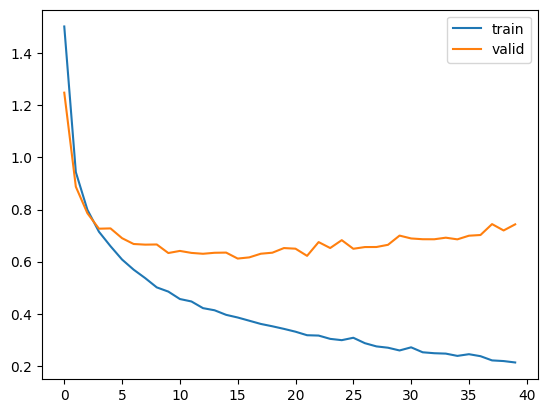

In [197]:
# Capturing learning history per epoch
hist_svhn  = pd.DataFrame(history_svhn.history)
hist_svhn['epoch'] = history_svhn.epoch

# Plotting accuracy at different epochs
plt.plot(hist_svhn['loss'])
plt.plot(hist_svhn['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results_svhn = model_svhn.evaluate(x_test_svhn, y_test_svhn)

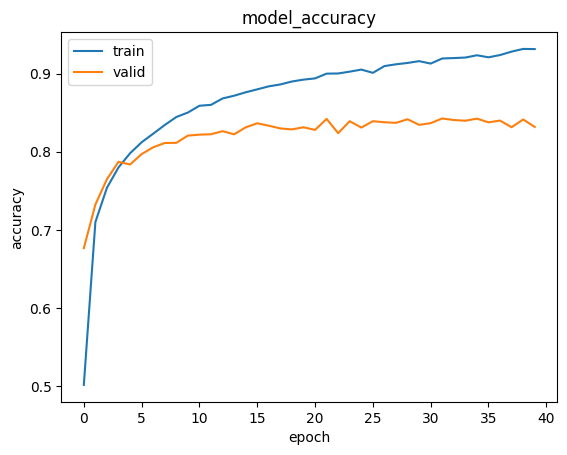

In [198]:
# Plotting accuracy at different epochs
plt.plot(history_svhn.history['accuracy'])
plt.plot(history_svhn.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(("train" , "valid") , loc ='best')
plt.show()

We can see here accuracy of 84% on test data with loss of 0.6842. It is definitely a good performing model with room for improvement.